# Outlier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
dataset=pd.read_csv(r"C:/Users/Smart/Downloads/loan_test.csv")
dataset.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          357 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [5]:
dataset.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,3.670000e+02,3.670000e+02,3.670000e+02,361.000000,338.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.537396,0.825444
std,4.910685e+05,2.334232e+05,6.296143e+06,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000


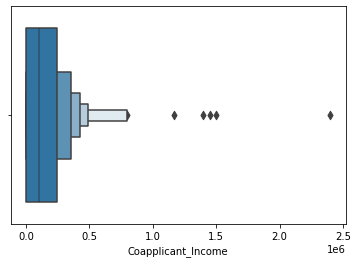

In [10]:
sns.boxenplot( x="Coapplicant_Income",data=dataset)
plt.show()

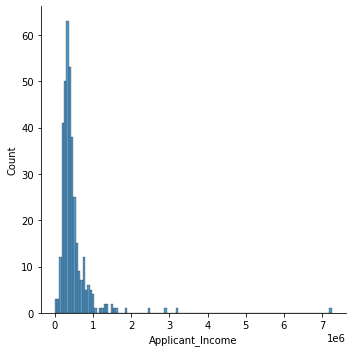

In [13]:
sns.displot(dataset["Applicant_Income"])
plt.show()

# Remove Outliers using IQR

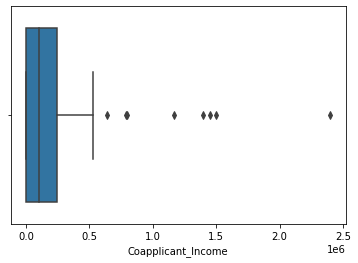

In [14]:
sns.boxplot(x="Coapplicant_Income",data=dataset)
plt.show()

In [15]:
dataset.shape

(367, 11)

In [21]:
q1 = dataset["Coapplicant_Income"].quantile(0.25)  
q3 = dataset["Coapplicant_Income"].quantile(0.75) 

In [22]:
q1

0.0

In [23]:
q3

243050.0

In [26]:
IQR=q3-q1

In [28]:
import numpy as np

In [32]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range

607625.0

In [33]:
max_range

607625.0

In [37]:
new_dataset=dataset[dataset["Coapplicant_Income"]<max_range]

In [38]:
new_dataset.shape

(359, 11)

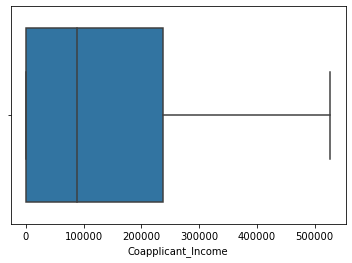

In [39]:
sns.boxplot(x="Coapplicant_Income",data=new_dataset)
plt.show()

# Feature Scaling (Standardization)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [73]:
dataset1=pd.read_csv(r"C:/Users/Smart/Downloads/loan_test.csv")
dataset1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban


In [74]:
dataset1.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [75]:
dataset1["Applicant_Income"].fillna(dataset1["Applicant_Income"].mean(),inplace=True)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
ss=StandardScaler()
ss.fit(dataset1[["Applicant_Income"]])

StandardScaler()

In [78]:
ss.transform(dataset1[["Applicant_Income"]])

array([[ 1.86460504e-01],
       [-3.52692250e-01],
       [ 3.96412970e-02],
       [-5.02774106e-01],
       [-3.11909137e-01],
       [-5.38459330e-01],
       [-5.26020481e-01],
       [-1.88540220e-01],
       [ 1.80004437e+00],
       [-4.90539172e-01],
       [-3.49633517e-01],
       [-5.34381019e-01],
       [-1.30424284e-01],
       [ 1.50232765e+00],
       [-2.84665018e-02],
       [ 1.75652979e-01],
       [-4.53914937e-02],
       [-2.07912199e-01],
       [ 9.01388475e-01],
       [-7.14846294e-01],
       [-5.94943942e-01],
       [-5.55180407e-01],
       [-1.82830585e-01],
       [-2.12194426e-01],
       [ 1.21207523e-01],
       [-9.79936529e-01],
       [-9.02529180e-02],
       [ 5.49430210e-01],
       [-2.10767017e-01],
       [-3.80016936e-01],
       [-4.74633758e-01],
       [ 2.94535753e-01],
       [-3.13540462e-01],
       [-4.12439511e-01],
       [-4.21207880e-01],
       [-3.37602499e-01],
       [ 5.18842875e-01],
       [-5.17659943e-01],
       [ 2.0

In [88]:
 dataset1['Applicant_Income_ss'] = ss.fit_transform(dataset1[['Applicant_Income']])
dataset1.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Applicant_Income_ss
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban,0.186461
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban,-0.352692
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban,0.039641
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban,-0.502774
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban,-0.311909
5,Male,Yes,0,Not Graduate,Yes,216500,342200,15200000,360.0,1.0,Urban,-0.538459
6,Female,No,1,Not Graduate,No,222600,0,5900000,360.0,1.0,Semiurban,-0.526020
7,Male,Yes,2,Not Graduate,No,388100,0,14700000,360.0,0.0,Rural,-0.188540
8,Male,Yes,2,Graduate,NaN,1363300,0,28000000,240.0,1.0,Urban,1.800044
9,Male,No,0,Not Graduate,No,240000,240000,12300000,360.0,1.0,Semiurban,-0.490539


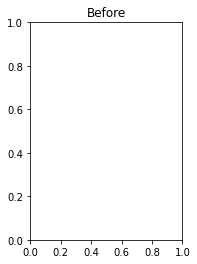

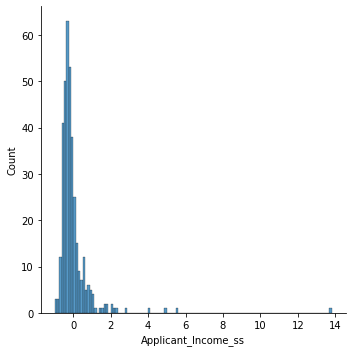

In [84]:
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(dataset1["Applicant_Income_ss"])

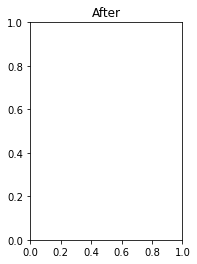

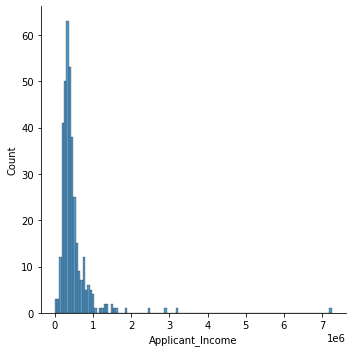

In [87]:
plt.subplot(1,2,2)
plt.title("After")
sns.displot(dataset1["Applicant_Income"])
plt.show()

# Handle Duplicate Data

In [89]:
import pandas as pd 

In [90]:
data={"name":["a","b","c","d","a","c"],"eng":[8,7,5,8,8,5],"hindi":[2,3,4,5,2,6]}

In [94]:
df = pd.DataFrame(data)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [100]:
df["duplicated"] = df.duplicated()
df

,name,eng,hindi,duplicated
0,a,8,2,False
1,b,7,3,False
2,c,5,4,False
3,d,8,5,False
4,a,8,2,True
5,c,5,6,False


In [109]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of   name  eng  hindi  duplicated
0    a    8      2       False
1    b    7      3       False
2    c    5      4       False
3    d    8      5       False
4    a    8      2        True
5    c    5      6       False>

In [106]:
df.drop_duplicates(inplace=True)
df

,name,eng,hindi,duplicated
0,a,8,2,False
1,b,7,3,False
2,c,5,4,False
3,d,8,5,False
4,a,8,2,True
5,c,5,6,False


In [110]:
import pandas as pd


data = {'col1': [1, 2, 2, 3, 3, 3], 'col2': [3, 4, 4, 5, 5, 6], 'col3': [7, 8, 8, 9, 9, 10]}
df = pd.DataFrame(data)


df_no_duplicates = df.drop_duplicates()


df_first_occurrence = df.drop_duplicates(keep='first')


df_last_occurrence = df.drop_duplicates(keep='last')


df['is_duplicated'] = df.duplicated()

ws
df_aggregated = df.groupby(['col1', 'col2']).agg({'col3': 'mean'}).reset_index()

# Display DataFrames
print("Original DataFrame:")
print(df)
print("\nDataFrame with duplicates removed:")
print(df_no_duplicates)
print("\nDataFrame keeping the first occurrence of duplicates:")
print(df_first_occurrence)
print("\nDataFrame keeping the last occurrence of duplicates:")
print(df_last_occurrence)
print("\nDataFrame with a new column marking duplicates:")
print(df)
print("\nDataFrame with aggregated duplicates:")
print(df_aggregated)


Original DataFrame:
   col1  col2  col3  is_duplicated
0     1     3     7          False
1     2     4     8          False
2     2     4     8           True
3     3     5     9          False
4     3     5     9           True
5     3     6    10          False

DataFrame with duplicates removed:
   col1  col2  col3
0     1     3     7
1     2     4     8
3     3     5     9
5     3     6    10

DataFrame keeping the first occurrence of duplicates:
   col1  col2  col3
0     1     3     7
1     2     4     8
3     3     5     9
5     3     6    10

DataFrame keeping the last occurrence of duplicates:
   col1  col2  col3
0     1     3     7
2     2     4     8
4     3     5     9
5     3     6    10

DataFrame with a new column marking duplicates:
   col1  col2  col3  is_duplicated
0     1     3     7          False
1     2     4     8          False
2     2     4     8           True
3     3     5     9          False
4     3     5     9           True
5     3     6    10          Fa